# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados
credit_record = pd.read_csv('/home/adrianoarchlinux/Downloads/archive/credit_record.csv')
application_record = pd.read_csv('/home/adrianoarchlinux/Downloads/archive/application_record.csv')

# Exibir as primeiras linhas dos dados para verificar o carregamento
print("Credit Record:")
print(credit_record.head())
print("\nApplication Record:")
print(application_record.head())

# Verificar se há valores ausentes
print("\nValores ausentes em Credit Record:")
print(credit_record.isnull().sum())
print("\nValores ausentes em Application Record:")
print(application_record.isnull().sum())

# Criar a variável 'TARGET' com base no 'STATUS' do credit_record
# Considerar 'mau pagador' se houver qualquer status diferente de '0' ou '1'
credit_record['STATUS'] = credit_record['STATUS'].astype(str)
credit_record['bad_debt'] = credit_record['STATUS'].apply(lambda x: 1 if x not in ['0', '1'] else 0)

# Agregar por ID para determinar se cada indivíduo tem histórico de 'mau pagador'
bad_debt_status = credit_record.groupby('ID')['bad_debt'].max().reset_index()
bad_debt_status.columns = ['ID', 'TARGET']

# Mesclar a variável 'TARGET' ao application_record
application_record = application_record.merge(bad_debt_status, on='ID', how='left')

# Preencher valores ausentes em 'TARGET' com 0 (considerar como bons pagadores)
application_record['TARGET'] = application_record['TARGET'].fillna(0)

# Garantir que não há variáveis string e criar dummies para variáveis categóricas
application_record = pd.get_dummies(application_record)

# Excluir as linhas com valores ausentes, se houver
application_record = application_record.dropna()

# Definir a variável resposta e as variáveis explicativas
X = application_record.drop('TARGET', axis=1)
y = application_record['TARGET']

# Dividir os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir as formas dos conjuntos de dados resultantes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Credit Record:
        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

Application Record:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

Primeiras linhas de bad_debt_status:
        ID  TARGET
0  5001711       1
1  5001712       1
2  5001713       1
3  5001714       1
4  5001715       1
Colunas de application_record após a mesclagem:
Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'TARGET'],
      dtype='object')


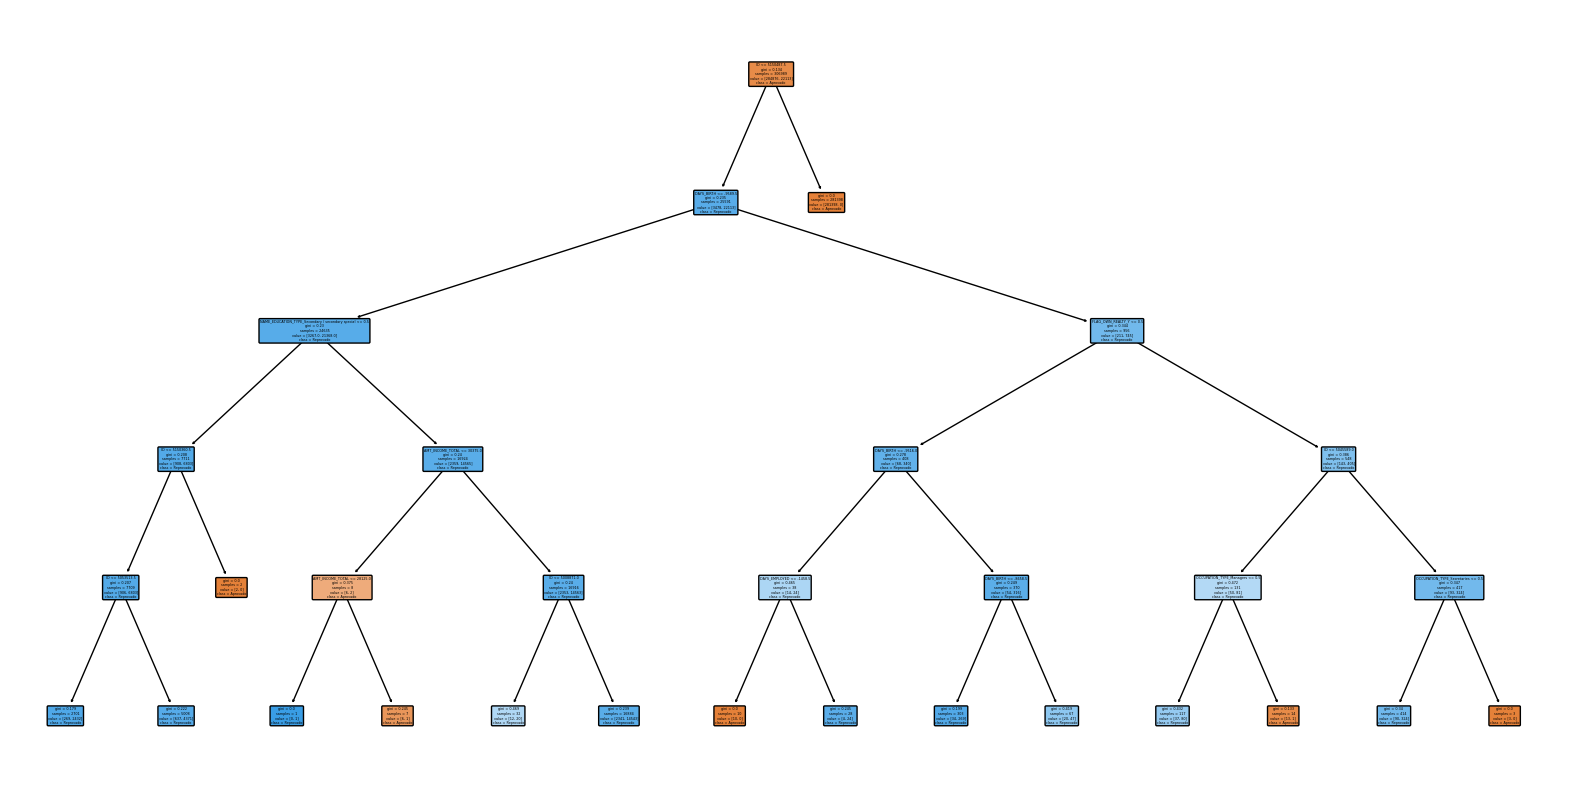

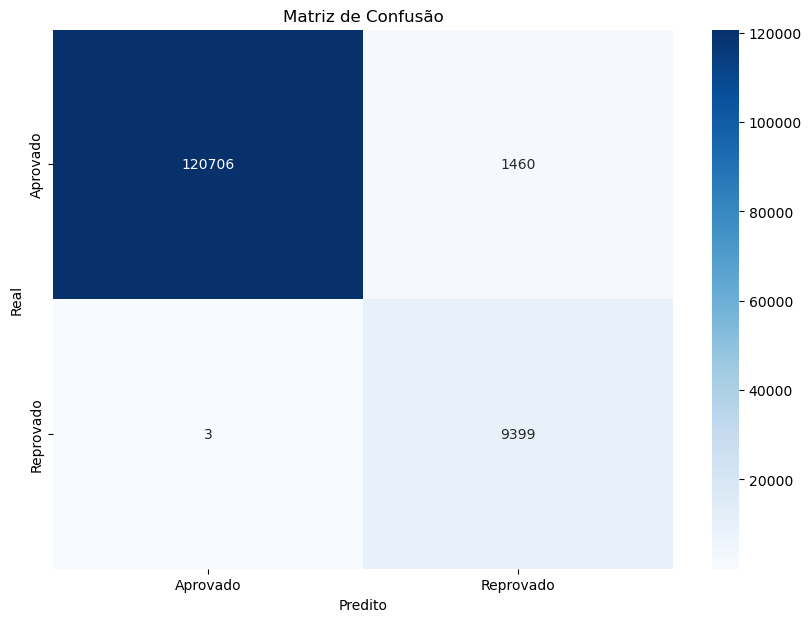

Acurácia na base de treinamento: 0.99


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
credit_record = pd.read_csv('/home/adrianoarchlinux/Downloads/archive/credit_record.csv')
application_record = pd.read_csv('/home/adrianoarchlinux/Downloads/archive/application_record.csv')

# Criar a variável 'TARGET' com base no 'STATUS' do credit_record
credit_record['STATUS'] = credit_record['STATUS'].astype(str)
credit_record['bad_debt'] = credit_record['STATUS'].apply(lambda x: 1 if x not in ['0', '1'] else 0)

# Agregar por ID para determinar se cada indivíduo tem histórico de 'mau pagador'
bad_debt_status = credit_record.groupby('ID')['bad_debt'].max().reset_index()
bad_debt_status.columns = ['ID', 'TARGET']

# Verificar se a coluna 'TARGET' foi criada corretamente
print("Primeiras linhas de bad_debt_status:")
print(bad_debt_status.head())

# Mesclar a variável 'TARGET' ao application_record
application_record = application_record.merge(bad_debt_status, on='ID', how='left')

# Verificar se a coluna 'TARGET' está presente após a mesclagem
print("Colunas de application_record após a mesclagem:")
print(application_record.columns)

# Renomear a coluna 'TARGET_y' para 'TARGET'
if 'TARGET_y' in application_record.columns:
    application_record['TARGET'] = application_record['TARGET_y']
    application_record.drop(['TARGET_x', 'TARGET_y'], axis=1, inplace=True)

# Preencher valores ausentes em 'TARGET' com 0 (considerar como bons pagadores)
application_record['TARGET'] = application_record['TARGET'].fillna(0)

# Garantir que não há variáveis string e criar dummies para variáveis categóricas
application_record = pd.get_dummies(application_record)
application_record = application_record.dropna()

# Definir a variável resposta e as variáveis explicativas
X = application_record.drop('TARGET', axis=1)
y = application_record['TARGET']

# Dividir os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir e treinar o modelo de árvore de decisão
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Aprovado', 'Reprovado'], rounded=True)
plt.show()

# Fazer previsões na base de validação
y_pred = model.predict(X_val)

# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_val, y_pred, labels=[0, 1])

# Visualizar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovado', 'Reprovado'], yticklabels=['Aprovado', 'Reprovado'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Calcular a acurácia na base de treinamento
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Acurácia na base de treinamento: {train_accuracy:.2f}")




#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

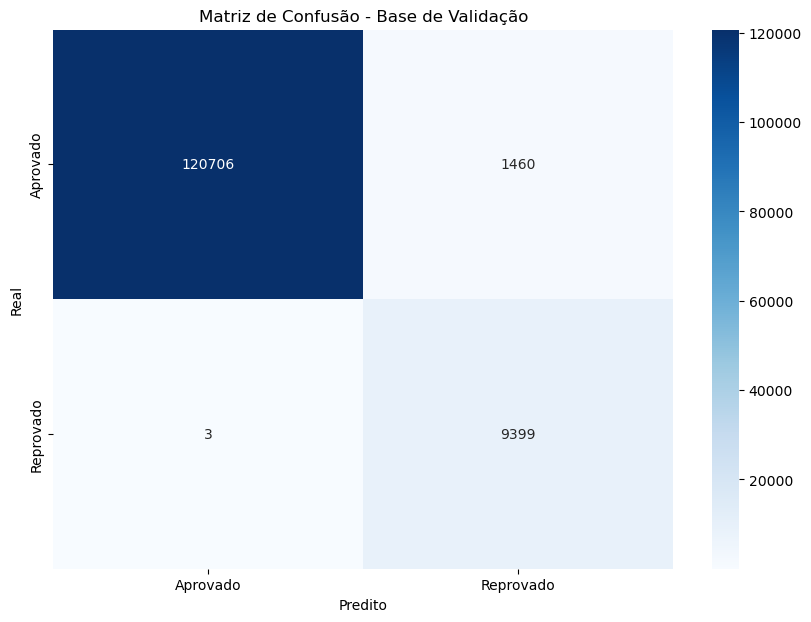

Acurácia na base de validação: 0.99


In [25]:
# Fazer previsões na base de validação
y_pred_val = model.predict(X_val)

# Criar a matriz de confusão para a base de validação
conf_matrix_val = confusion_matrix(y_val, y_pred_val, labels=[0, 1])

# Visualizar a matriz de confusão para a base de validação
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovado', 'Reprovado'], yticklabels=['Aprovado', 'Reprovado'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Validação')
plt.show()

# Calcular a acurácia na base de validação
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Acurácia na base de validação: {val_accuracy:.2f}")


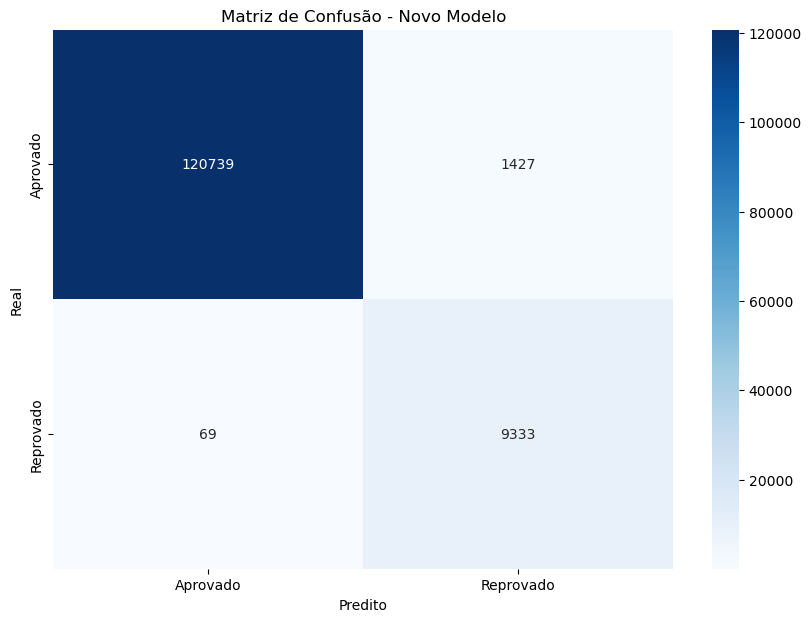

Acurácia na base de validação com o novo modelo: 0.99
Proporção de proponentes classificados como 'maus': 0.08


In [27]:
# Definir e treinar o novo modelo de árvore de decisão com os parâmetros ajustados
model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
model_new.fit(X_train, y_train)

# Fazer previsões na base de validação com o novo modelo
y_pred_val_new = model_new.predict(X_val)

# Criar a matriz de confusão para a base de validação com o novo modelo
conf_matrix_val_new = confusion_matrix(y_val, y_pred_val_new, labels=[0, 1])

# Visualizar a matriz de confusão para a base de validação com o novo modelo
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_val_new, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovado', 'Reprovado'], yticklabels=['Aprovado', 'Reprovado'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Novo Modelo')
plt.show()

# Calcular a acurácia na base de validação com o novo modelo
val_accuracy_new = accuracy_score(y_val, y_pred_val_new)
print(f"Acurácia na base de validação com o novo modelo: {val_accuracy_new:.2f}")

# Proporção de proponentes classificados como 'maus' pelo novo modelo
proportion_bad = (y_pred_val_new == 1).mean()
print(f"Proporção de proponentes classificados como 'maus': {proportion_bad:.2f}")


In [29]:
# Acurácia se todos os contratos fossem classificados como 'bons'
accuracy_all_good = (y_val == 0).mean()
print(f"Acurácia se todos os contratos fossem classificados como 'bons': {accuracy_all_good:.2f}")


Acurácia se todos os contratos fossem classificados como 'bons': 0.93
